# Implementing Linear Regression

### Overview
In this implementation, we will be looking at the following the steps as follows:

1.    Importing Libraries and Dataset
2.    Scaling the dataset
3.    Checking Multicollinearity and removing it
4.    Creating test and training partitions
5.    Implementing the Linear Regression model
6.    Generating predictions over the test set
7.    Evaluating the model
8.    Preparing the Residual plot.
9.    Checking the Assumptions of Linear Regression.
10.   Visualising the Coefficient plot


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Transformed_Housing_Prices.csv is formed after-
# 1. Exploring the target and the independent variables.
# 2. Treating the outliers and missing values in independent and target variables.
# 3. Transforming the categorical variables into numerical variables using dummy encoding.
# 4. Data we are using has already been through the basic preprocessing.



data = pd.read_csv(r"D:\House Price Prediction\Transformed_Housing_Prices.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall_Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_group_zipcode_group_1,Zipcode_group_zipcode_group_2,Zipcode_group_zipcode_group_3,Zipcode_group_zipcode_group_4,Zipcode_group_zipcode_group_5,Zipcode_group_zipcode_group_6,Zipcode_group_zipcode_group_7,Zipcode_group_zipcode_group_8,Zipcode_group_zipcode_group_9,luxury_home_Yes
0,221900.0,3,1.00,7.073270,5650.0,1.0,0,7,7.073270,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,7.851661,7242.0,2.0,0,7,7.682482,400,...,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,6.646391,10000.0,1.0,0,6,6.646391,0,...,0,1,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,7.580700,5000.0,1.0,0,7,6.956545,910,...,0,0,1,0,0,0,0,0,0,0
4,510000.0,3,2.00,7.426549,8080.0,1.0,0,8,7.426549,0,...,0,0,0,1,0,0,0,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall_Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Latitude              

# 1. Treating Multicollinearity

### Scaling the dataset

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
# seperating Target variable

Y = data['Sale_Price']

In [6]:
X = scaler.fit_transform(data.drop(columns=['Sale_Price']))
X = pd.DataFrame(data = X, columns= data.drop(columns=['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall_Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Latitude,...,Zipcode_group_zipcode_group_1,Zipcode_group_zipcode_group_2,Zipcode_group_zipcode_group_3,Zipcode_group_zipcode_group_4,Zipcode_group_zipcode_group_5,Zipcode_group_zipcode_group_6,Zipcode_group_zipcode_group_7,Zipcode_group_zipcode_group_8,Zipcode_group_zipcode_group_9,luxury_home_Yes
0,-0.398724,-1.447526,-1.123272,-0.228291,-0.915389,-0.30579,-0.563993,-0.752122,-0.658697,-0.352576,...,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.956474
1,-0.398724,0.175684,0.709431,-0.189858,0.936817,-0.30579,-0.563993,0.672689,0.245134,1.161645,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.956474
2,-1.474115,-1.447526,-2.128348,-0.123276,-0.915389,-0.30579,-1.468566,-1.750497,-0.658697,1.283619,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.956474
3,0.676667,1.149611,0.071459,-0.243983,-0.915389,-0.30579,-0.563993,-1.025114,1.397518,-0.283288,...,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.956474
4,-0.398724,-0.148958,-0.291485,-0.169628,-0.915389,-0.30579,0.340581,0.074118,-0.658697,0.409587,...,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.045507


### Cheacking and Removing Multicollinearity

In [16]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall_Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Latitude,...,Zipcode_group_zipcode_group_1,Zipcode_group_zipcode_group_2,Zipcode_group_zipcode_group_3,Zipcode_group_zipcode_group_4,Zipcode_group_zipcode_group_5,Zipcode_group_zipcode_group_6,Zipcode_group_zipcode_group_7,Zipcode_group_zipcode_group_8,Zipcode_group_zipcode_group_9,luxury_home_Yes
No of Bedrooms,1.000000,0.515813,0.620788,0.031692,0.175536,0.079575,0.349223,0.514917,0.303294,-0.008708,...,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694,0.267324
No of Bathrooms,0.515813,1.000000,0.761225,0.087732,0.500776,0.187791,0.635638,0.694711,0.283798,0.024570,...,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871,0.549320
Flat Area (in Sqft),0.620788,0.761225,1.000000,0.148739,0.367863,0.246770,0.721705,0.865043,0.423228,0.039450,...,-0.046515,-0.066504,-0.083650,0.097457,0.072137,0.151378,0.047171,0.148091,0.067209,0.587734
Lot Area (in Sqft),0.031692,0.087732,0.148739,1.000000,-0.005162,0.074668,0.102314,0.162421,0.015252,-0.085719,...,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671,0.072405
No of Floors,0.175536,0.500776,0.367863,-0.005162,1.000000,0.029504,0.461368,0.547594,-0.245572,0.049692,...,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868,0.456148
No of Times Visited,0.079575,0.187791,0.246770,0.074668,0.029504,1.000000,0.223661,0.158648,0.276974,0.006162,...,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923,0.197486
Overall_Grade,0.349223,0.635638,0.721705,0.102314,0.461368,0.223661,1.000000,0.722005,0.145232,0.111226,...,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638,0.811908
Area of the House from Basement (in Sqft),0.514917,0.694711,0.865043,0.162421,0.547594,0.158648,0.722005,1.000000,-0.050613,-0.018495,...,-0.017390,-0.056582,-0.098789,0.092744,0.057198,0.123265,0.029638,0.125510,0.066043,0.600802
Basement Area (in Sqft),0.303294,0.283798,0.423228,0.015252,-0.245572,0.276974,0.145232,-0.050613,1.000000,0.110451,...,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775,0.102811
Latitude,-0.008708,0.024570,0.039450,-0.085719,0.049692,0.006162,0.111226,-0.018495,0.110451,1.000000,...,-0.199187,0.120400,0.283760,0.249304,0.190199,0.090785,0.056373,0.036085,0.022867,0.085241


### Pair of independent variables with correlation greater than 0.5

In [20]:
# writing the code as a list comprehension
k = X.corr()
z = [[str(i),str(j),k.loc[i,j].round(2)] for i in k.columns for j in k.columns if (k.loc[i , j] > abs(0.5)) and (i!=j)]


pd.DataFrame(z, columns=['independent variable 1', 'independent variable 2', "corr_coefficient (r)"])

,independent variable 1,independent variable 2,corr_coefficient (r)
0,No of Bedrooms,No of Bathrooms,0.52
1,No of Bedrooms,Flat Area (in Sqft),0.62
2,No of Bedrooms,Area of the House from Basement (in Sqft),0.51
3,No of Bathrooms,No of Bedrooms,0.52
4,No of Bathrooms,Flat Area (in Sqft),0.76
5,No of Bathrooms,No of Floors,0.50
6,No of Bathrooms,Overall_Grade,0.64
7,No of Bathrooms,Area of the House from Basement (in Sqft),0.69
8,No of Bathrooms,Living Area after Renovation (in Sqft),0.57
9,No of Bathrooms,luxury_home_Yes,0.55


### Calculating VIF

In [21]:
# importing variance_inflation_factor function from the statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

# Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns )
VIF

No of Bedrooms                                1.789112
No of Bathrooms                               3.253114
Flat Area (in Sqft)                          33.356689
Lot Area (in Sqft)                            2.097978
No of Floors                                  2.236038
No of Times Visited                           1.450324
Overall_Grade                                 4.647269
Area of the House from Basement (in Sqft)    27.587965
Basement Area (in Sqft)                       8.478719
Latitude                                      2.460381
Longitude                                     1.670271
Living Area after Renovation (in Sqft)        2.887303
Lot Area after Renovation (in Sqft)           2.141926
Year Since Renovation                         2.779969
Waterfront_View_Yes                           1.209580
Condition_of_the_House_Good                   1.197897
Condition_of_the_House_Okay                   1.129001
Ever_Renovated_Yes                            2.872848
Age of Hou

### Removing columns with Multicollinearity more than 5

In [24]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [25]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns )
    if vif.max() > 5:
        indx = vif[vif==vif.max()].index[0]
        print(indx , 'has been removed')
        data = data.drop(columns=[indx])
        return data
    else:
        print('No Multicollinearity present anymore')
        return data

In [26]:
for i in range(7):
    vif_data = MC_remover(vif_data)
    
vif_data.head()

Flat Area (in Sqft) has been removed
Age of House_Very Old has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall_Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Latitude,Longitude,...,Zipcode_group_zipcode_group_1,Zipcode_group_zipcode_group_2,Zipcode_group_zipcode_group_3,Zipcode_group_zipcode_group_4,Zipcode_group_zipcode_group_5,Zipcode_group_zipcode_group_6,Zipcode_group_zipcode_group_7,Zipcode_group_zipcode_group_8,Zipcode_group_zipcode_group_9,luxury_home_Yes
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.752122,-0.658697,-0.352576,-0.306226,...,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.956474
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.672689,0.245134,1.161645,-0.746479,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.956474
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.750497,-0.658697,1.283619,-0.135806,...,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.956474
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-1.025114,1.397518,-0.283288,-1.271941,...,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,-0.956474
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,0.074118,-0.658697,0.409587,1.199152,...,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158,1.045507


### Calculating VIF for remaining columns

In [27]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns )
VIF, len(vif_data.columns)

(No of Bedrooms                               1.745331
 No of Bathrooms                              3.070553
 Lot Area (in Sqft)                           2.095563
 No of Floors                                 2.070999
 No of Times Visited                          1.413492
 Overall_Grade                                4.568786
 Area of the House from Basement (in Sqft)    4.915473
 Basement Area (in Sqft)                      1.949777
 Latitude                                     2.452662
 Longitude                                    1.608568
 Living Area after Renovation (in Sqft)       2.824415
 Lot Area after Renovation (in Sqft)          2.140630
 Year Since Renovation                        2.778744
 Waterfront_View_Yes                          1.209532
 Condition_of_the_House_Good                  1.178220
 Condition_of_the_House_Okay                  1.125373
 Ever_Renovated_Yes                           2.833093
 Age of House_Old                             1.548953
 Zipcode_g

# 2.Training the Model

### Train/Test set

In [28]:
X = vif_data
Y = data['Sale_Price']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

#### all the coefficient corresponding to independent variables that our liner regeresion has calculated.
#### since data is normalized c = 0
#### this coefficient are nothing but y = c + m1x1 +m2x2 + m3x3.....mnxn

In [32]:
lr.coef_

array([ -7179.38548672,  10659.17653089,  17522.50077065,  -3679.5381236 ,
        28887.97984259,  61883.03435953,  82454.30001533,  28424.80838151,
        21442.6937992 , -27581.5955075 ,  17143.68245914,   -782.9933518 ,
        -9604.80579364,  11729.23426189, -15611.13763832,  -7291.10864269,
        15921.80242844, -20826.207577  ,  11976.74085329,  34984.33850976,
        67558.04835134,  84705.12186057,  52686.90639965,  78461.56062276,
        42862.566301  ,  70202.33718845,  24097.24964792,  -9021.20548987])

In [46]:
predictions = lr.predict(x_test)

lr.score(x_test, y_test)

0.8375704749508486

# 3. Verifying the Assumptions of Linear Regression

### Residuals

In [34]:
residuals = predictions - y_test

residual_table = pd.DataFrame({
    'residuals':residuals,
    'predictions':predictions
})
residual_table = residual_table.sort_values(by= 'predictions')

In [35]:
residual_table.head(10)

,residuals,predictions
19450,-386348.013143,-244348.013143
1147,-268637.095676,-193637.095676
4201,-278374.088480,-128374.088480
11586,-238967.212190,-50967.212190
12073,-191724.745131,-35724.745131
18057,-292087.936006,-17087.936006
2925,-176094.029336,-9094.029336
1064,-147039.280225,-7039.280225
19342,-153740.484480,-2740.484480
16950,-129415.855959,-415.855959


In [36]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

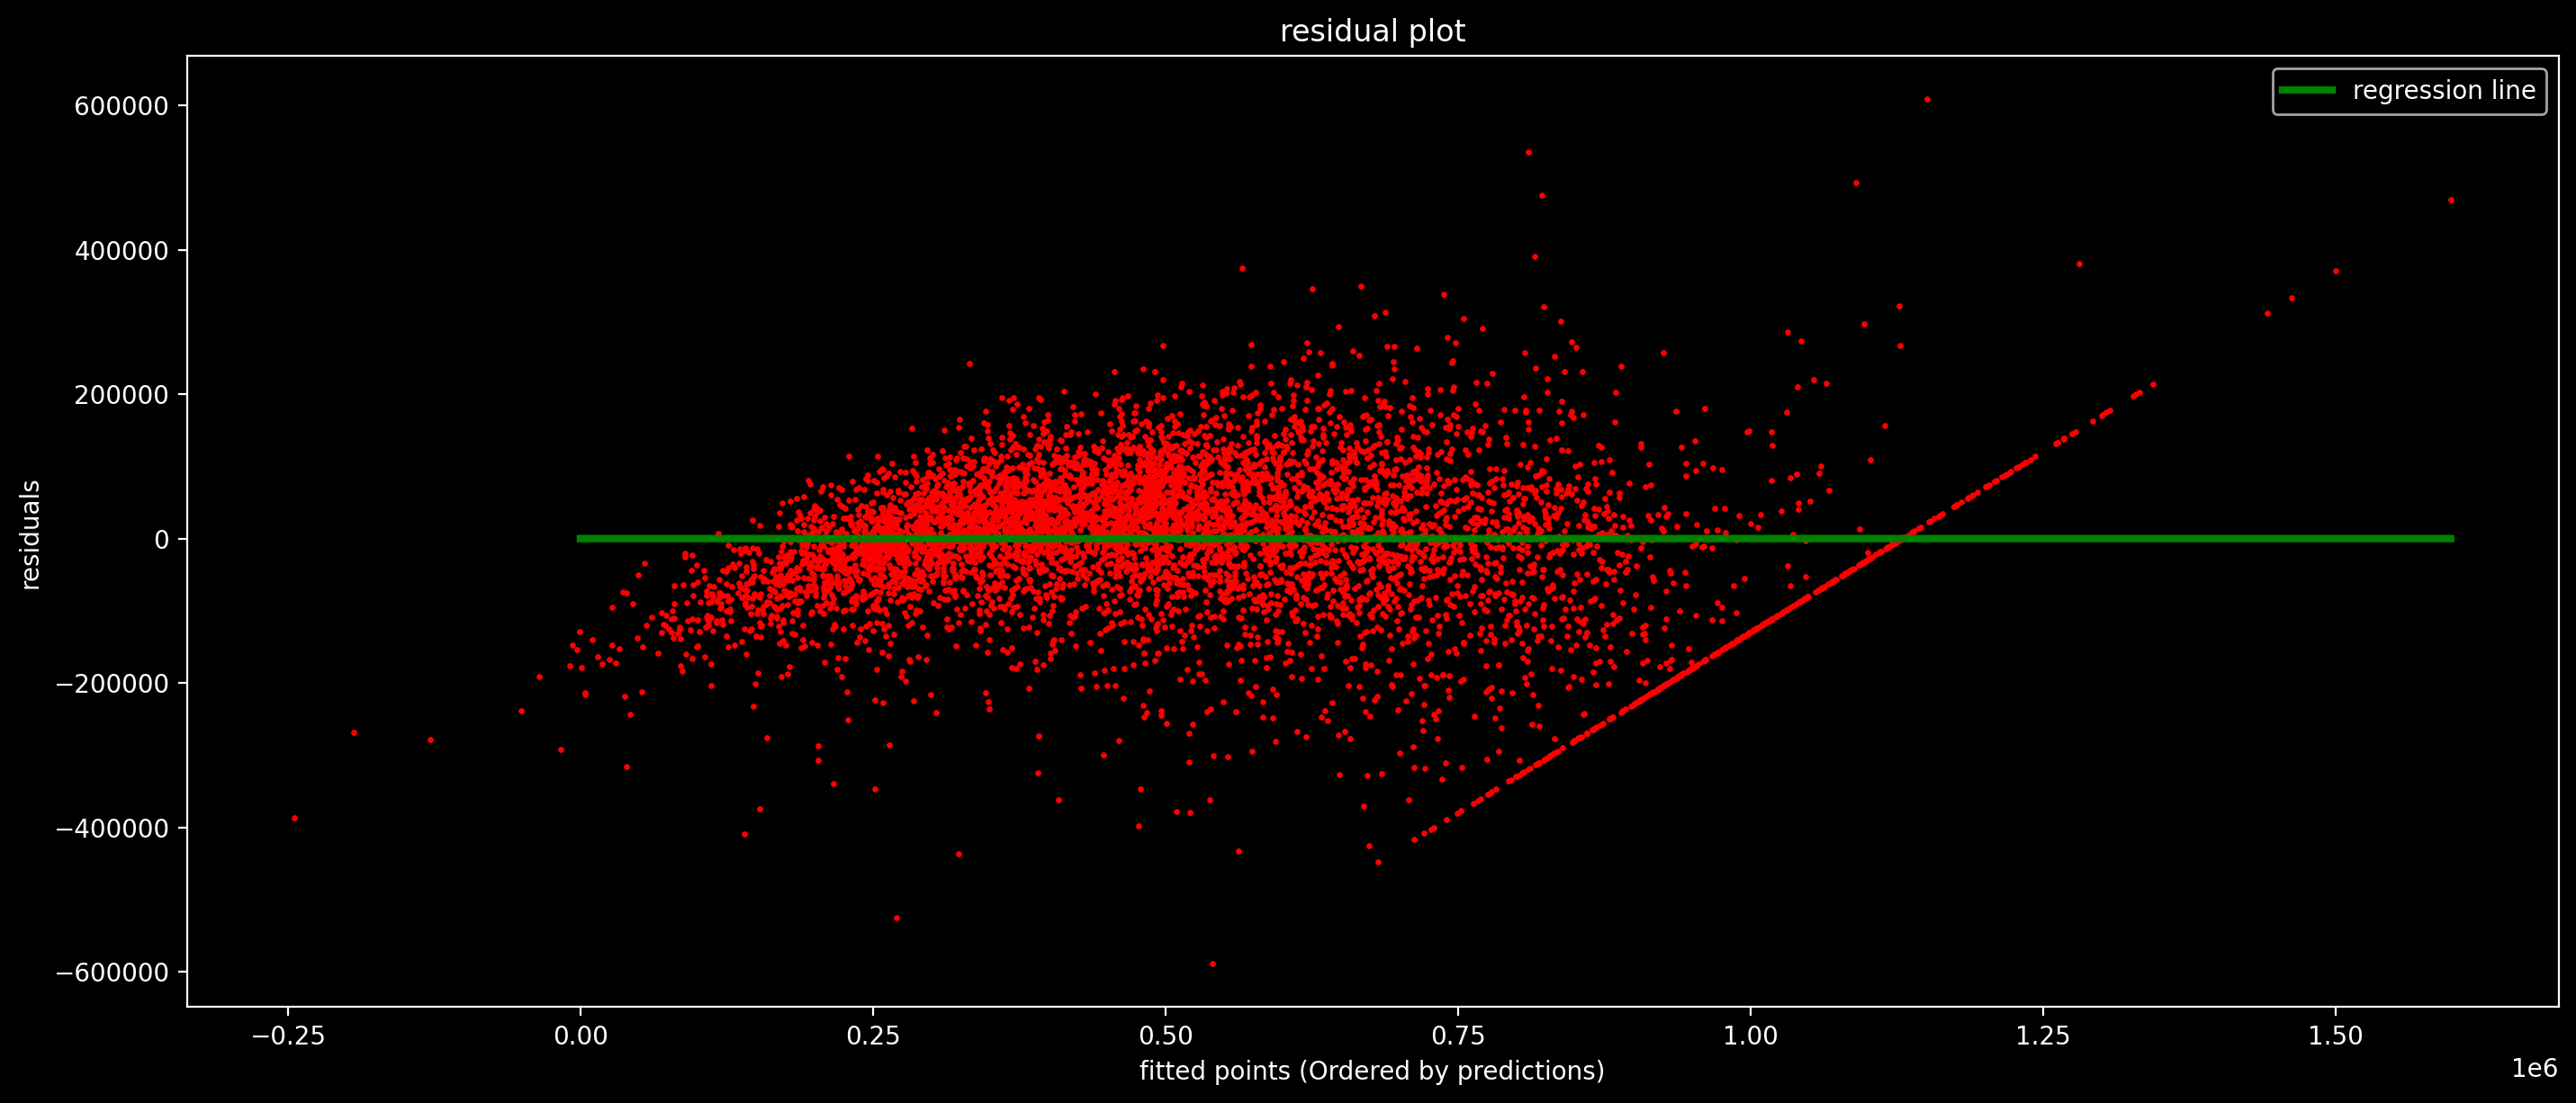

In [37]:
plt.figure(dpi=200, figsize=(17,7))

plt.scatter(
    residual_table['predictions'],
    residual_table['residuals'],
    color='red',
    s=2
)

plt.plot(
    z,
    k,
    color='green',
    linewidth=3,
    label='regression line'
)

plt.xlabel('fitted points (Ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

### residuals are normally distributed

# 4. Distribution of errors

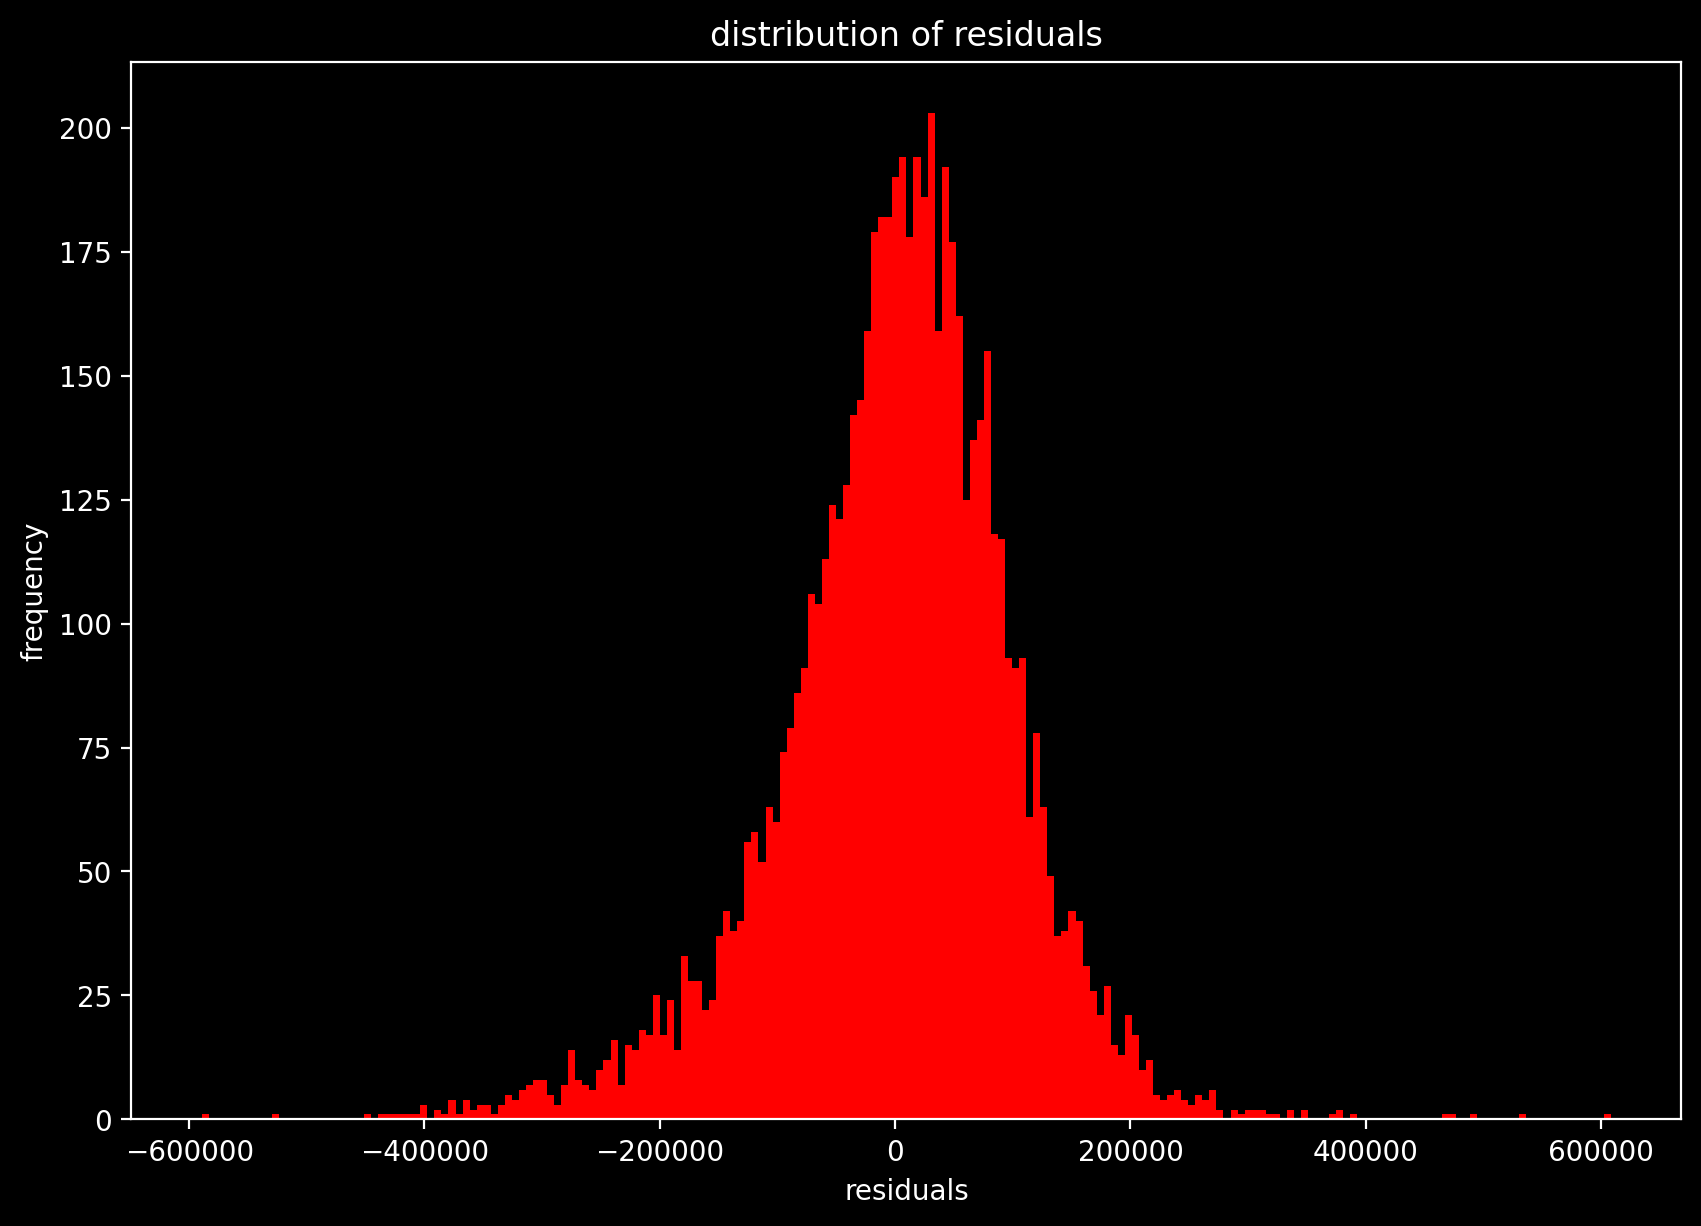

In [39]:
plt.figure(dpi = 200, figsize=(10,7))
plt.hist(residual_table['residuals'],color='red',bins=200)

plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# 5. Interpreting the Results of Your Linear Regression Model

### Model Coefficients

In [40]:
coefficients_table = pd.DataFrame({
    'column': x_train.columns,
    'coefficients': lr.coef_
})

coefficient_table = coefficients_table.sort_values(by = 'coefficients')

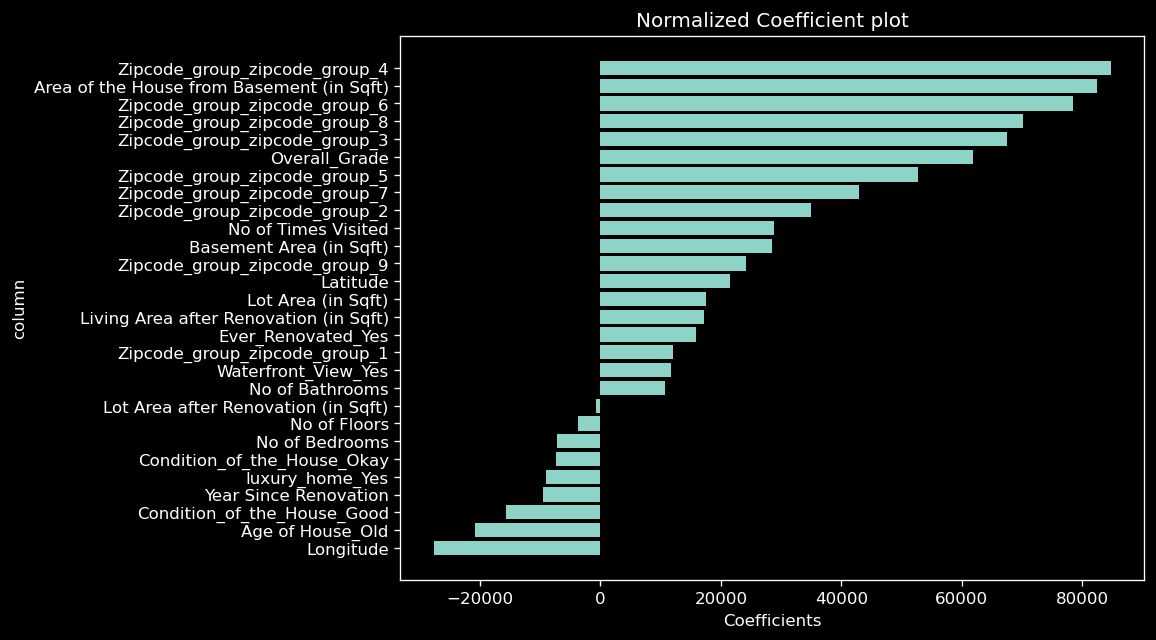

In [41]:
plt.figure(figsize=(8,6),dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh(x , y)
plt.xlabel('Coefficients')
plt.ylabel('column')
plt.title('Normalized Coefficient plot')
plt.show()